<img src="Images/IMG-dirty-data.jpg">
Bei der Verarbeitung von Daten mit maschinellen Lernverfahren sieht man sich oft mit Datensätzen konfrontiert, die aus vielen verschiedenen Merkmalen bestehen. Diese Merkmale sind dabei oft heterogen: manche werden durch einen kontinuierlichen Zahlenwert kodiert, manche können nur bestimmte diskrete Stufen annehmen, manche sind vielleicht durch ein Wort oder sogar ganze Sätze kodiert. Oftmals fehlen auch einzelne Werte von Merkmalen, bspw. weil ein Sensor in einem multimodalen Messsystem kurzzeitig ausgefallen war oder weil bei einem Fragebogen nicht alle Fragen beantwortet wurden. Die meisten maschinellen Lernverfahren erwarten aber vollständig besetzte, ausschließlich numerische Merkmalvektoren am Eingang. 

<img style="float: right; margin:5px 0px 0px 10px" src="Images/IMG-lego-logo.svg" alt="Lego-Logo" height="128" width="128">

In diesem Notebook sollen Sie Verfahren kennenlernen und anwenden, die bei der Vorverarbeitung eines gemischten Datensatzes ("Dirty Data") zum Einsatz kommen können. Als Beispieldatensatz verwenden wir eine Datei, die durch Extraktion der Daten aller auf www.lego.com verfügbaren Produkte entstanden ist (siehe auch [Web Scraping](https://en.wikipedia.org/wiki/Web_scraping)). Der Inhalt der einzelnen Spalten sollte anhand der Spaltentitel weitgehend selbsterklärend sein.

## Inhalt
<table style="width:256; border: 1px solid black; display: inline-block">
  <tr>
    <td  style="text-align:right" width=64px><img src="Images/IMG-csv-in.png" style="float:left"></td>
      <td style="text-align:left" width=128px>
          <a style="color:black; font-size:14px; font-weight:bold; text-decoration:none" href='#import_data'>Daten importieren</a>
      </td>
  </tr>
  <tr>
    <td style="text-align:right"><img src="Images/IMG-magnifying-glass.png" style="float:left"></td>
    <td style="text-align:left" width=128px><a style="color:black; font-size:14px; font-weight:bold; text-decoration:none" href='#analyze_data'>Daten analysieren</a>
      </td>
  </tr>
    <tr>
    <td style="text-align:right"><img src="Images/IMG-broom.png" style="float:left"></td>
    <td style="text-align:left" width=128px><a style="color:black; font-size:14px; font-weight:bold; text-decoration:none" href='#clean_data'>Daten säubern</a>
        </td>
    </tr>
    <tr>
    <td style="text-align:right"><img src="Images/IMG-csv-out.png" style="float:left"></td>
    <td style="text-align:left" width=128px><a style="color:black; font-size:14px; font-weight:bold; text-decoration:none" href='#save_data'>Daten speichern</a>
        </td>
  </tr>
</table>


<a id='import_data'></a><div><img src="Images/IMG-csv-in.png" style="float:left"> <h2 style="position: relative; top: 6px">1. Daten Importieren</h2>
<p style="position: relative; top: 10px">
Die unbearbeiteten Rohdaten liegen im Format einer <a href="https://de.wikipedia.org/wiki/CSV_(Dateiformat)">CSV-Datei</a> vor. In den meisten <a href="https://de.wikipedia.org/wiki/H%C3%B6here_Programmiersprache">höheren Programmiersprachen</a> (wie z.B. Python oder Matlab) existieren bereits Methoden zum Import dieser einfach strukturierten Dateien. Im Falle von Python geht das z.B. mit der Funktion <a href="https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html#pandas.read_csv">read_csv()</a> aus dem Modul <a href="https://pandas.pydata.org/docs/getting_started/10min.html#min">pandas (Klick hier für eine 10minütige Tour)</a>. 
</p>

Das funktioniert zum Beispiel so:

```python
import pandas as pd
data = pd.read_csv("Path/to/data.csv")
```

Probieren Sie es in der nächsten Zelle gleich mal aus! Die CSV-Datei ``lego_sets.csv`` befindet sich im Unterverzeichnis ``Data``.

In [1]:
# Hier können Sie Python-Code hineinschreiben und mit Shift+Enter ausführen!

# Modul importieren
import pandas as pd
import numpy
# CSV-Datei lesen (Daten als DataFrame speichern)
data = pd.read_csv("Data/lego_sets.csv")

Sehen wir uns mal an, wie pandas die eingelesenen Daten abspeichert. Sie finden diese Information natürlich in der Dokumentation, aber Sie können auch die [Built-In Funktion type()](https://docs.python.org/3/library/functions.html#type) verwenden:

In [2]:
# Welchen Typ hat die angelegte Datenstruktur?
print(type(data))

<class 'pandas.core.frame.DataFrame'>


Wie Sie nun wissen sollten, werden die Daten der Lego-Sets als [``DataFrame``](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.html#pandas.DataFrame) gespeichert.  
Ein ``DataFrame`` ist eine tabellarische Datenstruktur in pandas, die einen geordneten Satz von Spalten enthält. Jede Spalte kann einen anderen Datentyp haben (numerisch, string, boolesch usw.). Ein ``DataFrame`` hat sowohl einen Zeilenindex als auch einen Spaltenindex.

Um einen schnellen Blick auf die Datenstruktur werfen zu können, bietet pandas die Funktionen [``head()``](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.head.html) und [``tail()``](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.tail.html#pandas.DataFrame.tail), um sich die ersten oder letzten Zeilen der Struktur anzeigen zu lassen.

In [3]:
## Werfen Sie einen Blick in die Datenstruktur
print(data.head())

   ages  list_price  num_reviews  piece_count  play_star_rating  \
0  6-12       29.99          2.0        277.0               4.0   
1  6-12       19.99          2.0        168.0               4.0   
2  6-12       12.99         11.0         74.0               4.3   
3   12+       99.99         23.0       1032.0               3.6   
4   12+       79.99         14.0        744.0               3.2   

                                           prod_desc  prod_id  \
0  Catapult into action and take back the eggs fr...  75823.0   
1  Launch a flying attack and rescue the eggs fro...  75822.0   
2  Chase the piggy with lightning-fast Chuck and ...  75821.0   
3  Explore the architecture of the United States ...  21030.0   
4  Recreate the Solomon R. Guggenheim Museum® wit...  21035.0   

                                      prod_long_desc review_difficulty  \
0  Use the staircase catapult to launch Red into ...           Average   
1  Pilot Pig has taken off from Bird Island with ...      

Sie können natürlich auch gezielt einzelne Elemente aus dem ``DataFrame`` indizieren. Das geht für ganze Spalten grundsätzlich ähnlich wie bei dem Python Standardtyp [*dictionary*](https://docs.python.org/3/tutorial/datastructures.html#dictionaries):

```python
some_dataFrame['some_column_name']
```

Wenn Sie mehrere Spalten zurückgeben wollen, können Sie dem ``[]`` Operator eine Liste der Spaltennamen übergeben:

```python
some_dataFrame[['some_column_name', 'another_column_name']]
```

In [4]:
# Geben Sie alle Product IDs aus
data['prod_id']
# Geben Sie nur die Bewertungssterne und die Anzahl der Reviews aus
data[['val_star_rating','num_reviews']]

,val_star_rating,num_reviews
0,4.0,2.0
1,4.0,2.0
2,4.1,11.0
3,4.3,23.0
4,4.1,14.0
...,...,...
12256,4.2,6.0
12257,4.1,8.0
12258,4.5,18.0
12259,5.0,1.0


Möchten Sie (zusätzlich) die Auswahl auf einzelne Zeilen beschränken, bietet pandas die zwei Möglichkeiten ``.loc`` und ``.iloc``. Dabei ist ``.loc`` für die Verwendung mit Labels gedacht und ``.iloc`` für rein numerische Indices:

```python
some_dataFrame.loc[20:40, ['some_column_name', 'another_column_name]]
```

```python
some_dataFrame.iloc[20:40, 2:3]
```

Die Variante mit ``.loc`` ist sehr nützlich für die Auswahl _einzelner_ Zeilen oder Spalten, während ``.iloc`` besser geeignet für die Auswahl von _Spannen_ von Zeilen oder Spalten ist.

__Achtung__: Die beiden Varianten haben unterschiedliche Inklusivität der Index-Spannen!

In [5]:
# Geben Sie 100 Zeilen von zwei beliebigen Spalten irgendwo aus dem Datensatz zurück. Vergleichen Sie .loc und .iloc!
data.loc[2:102,['star_rating','set_name']]

,star_rating,set_name
2,4.3,Piggy Car Escape
3,4.6,United States Capitol Building
4,4.6,Solomon R. Guggenheim Museum®
5,4.9,Shanghai
6,4.2,New York City
...,...,...
98,3.6,Jungle Buggy
99,4.6,Fun in the park - City People Pack
100,4.6,Volcano Heavy-lift Helicopter
101,4.6,Volcano Exploration Base


Mehr zum Objekt ``DataFrame`` finden Sie unter [DataFrame](https://pandas.pydata.org/pandas-docs/stable/reference/frame.html).

---

<a id="analyze_data"></a><div><img src="Images/IMG-magnifying-glass.png" style="float:left"> <h2 style="position: relative; top: 6px">2. Daten analysieren</h2>

<p style="position: relative; top: 10px">
Nachdem die Daten erfolgreich eingelesen wurden und wir uns über die Struktur der Daten informiert haben, können wir uns mit dem eigentlichen Inhalt befassen. Zunächst interessiert uns, in welcher Form die Daten jeder Spalte gespeichert sind. Dazu bietet ein pandas <code>DataFrame</code> das Property <code>.dtypes</code> an:
</p>

In [6]:
# Geben Sie den Wert des Attributs ".dtypes" Ihres Datensatzes aus
data.dtypes

ages                  object
list_price           float64
num_reviews          float64
piece_count          float64
play_star_rating     float64
prod_desc             object
prod_id              float64
prod_long_desc        object
review_difficulty     object
set_name              object
star_rating          float64
theme_name            object
val_star_rating      float64
country               object
dtype: object

Ihnen sollte auffallen, dass einige der Spalten numerisch sind (``float64``), andere dagegen den Type ``object`` aufweisen. Da es unser Ziel ist, einen rein numerischen Datensatz zu erzeugen, müssen wir die nicht-numerischen Merkmale auf geeignete Art und Weise ersetzen bzw. konvertieren. Um den Überblick zu behalten, legen wir uns daher eine Liste mit allen Namen der zu konvertierenden Spalten an. 

Hierbei kann uns eine weitere Indizierungsart von ``DataFrame`` helfen: Indizierung mit einem booleschen Array. Dabei erzeugen wir ein Array von booleschen Werten, dessen Länge der Anzahl der zu indizierenden Dimension hat. Dabei steht ``True`` dafür, den Index im Aufruf zu berücksichtigen und ``False`` für die Unterdrückung des Index.

```python
some_dataFrame_with_three_columns.loc[:,[True, True, False]] # Gibt die ersten zwei Spalten des dreispaltigen DataFrame zurück
```

Dieses Array können Sie für gut lesbaren Code auch direkt im Aufruf berechnen, z.B. durch relationale Operatoren (``<>==``).

Probieren Sie es gleich mal aus. Lesen Sie dazu zunächst das Attribut des ``DataFrame`` mit den Spaltentiteln aus (``.columns``). Legen Sie dann nur die Titel, für die das Attribut ``.dtypes`` den Wert ``'object'`` hat als Liste (Umwandlung mit ``list()``) ab.


In [7]:
# Auslesen der Spaltentitel
list(data.loc[:,data.dtypes == 'object'].columns)

['ages',
 'prod_desc',
 'prod_long_desc',
 'review_difficulty',
 'set_name',
 'theme_name',
 'country']

Neben ungeeigneten Typen können auch fehlende Einträge im Datensatz die nachfolgende Vearbeitung verhindern. Daher interessiert uns als nächstes, ob und wo Einträge fehlen. Pandas stellt dazu die Methode ``isna()`` bereit, die für fehlende Einträge ``True`` und für existierende Einträge ``False`` zurückgibt. Mit der Methode ``any()`` kann dann geprüft werden, ob in einer Spalte irgendwo ein Wert fehlt:

```python
some_dataFrame.isna().any()
```

In [8]:
# Finden Sie die Spalten, in denen Werte fehlen.
data.isna().any()

ages                 False
list_price           False
num_reviews           True
piece_count          False
play_star_rating      True
prod_desc             True
prod_id              False
prod_long_desc       False
review_difficulty     True
set_name             False
star_rating           True
theme_name            True
val_star_rating       True
country              False
dtype: bool

Wenn in einer Spalte nur wenige Werte fehlen, können Sie möglicherweise sinnvoll aufgefüllt werden (siehe <a href="#clean_data">Daten säubern</a>). Wenn allerdings sehr viele Daten fehlen, muss eventuell die ganze Spalte entfernt werden. Mit der Methode ``count()`` können alle vorhandenen Einträge jeder Spalte gezählt werden.

```python
some_dataFrame.count()
```

In [9]:
# Geben Sie die Zahl der in jeder Spalte vorhandenen Einträge zurück
data.count()

ages                 12261
list_price           12261
num_reviews          10641
piece_count          12261
play_star_rating     10486
prod_desc            11884
prod_id              12261
prod_long_desc       12261
review_difficulty    10206
set_name             12261
star_rating          10641
theme_name           12258
val_star_rating      10466
country              12261
dtype: int64

Setzen Sie die Zahlen nun ins Verhältnis zur Gesamtzahl der Einträge. Dazu können Sie mit dem Attribut ``shape`` zunächst ein [Tupel](https://docs.python.org/3/tutorial/datastructures.html#tuples-and-sequences) mit der Anzahl der Reihen und Spalten erzeugen.

In [10]:
# Geben Sie den relativen Anteil der vorhandenen Einträge in jeder Spalte zurück
data.count() / data.shape[0]

ages                 1.000000
list_price           1.000000
num_reviews          0.867874
piece_count          1.000000
play_star_rating     0.855232
prod_desc            0.969252
prod_id              1.000000
prod_long_desc       1.000000
review_difficulty    0.832395
set_name             1.000000
star_rating          0.867874
theme_name           0.999755
val_star_rating      0.853601
country              1.000000
dtype: float64

Selbst die Spalte mit den meisten fehlenden Einträgen bringt es demnach noch auf über 80 % vorhandener Einträge, was das Einfüllen der Werte ([Imputation](https://de.wikipedia.org/wiki/Imputation_(Statistik))) noch sinnvoll erscheinen lässt. Diese Entscheidung muss allerdings in jedem konkreten Problem neu abgewogen werden und hier können auch keine allgemein gültigen Richtwerte angegeben werden.

Für unsere Zwecke gehen wir nun aber davon aus, dass in jeder Spalte genügend Daten vorhanden sind. Im nächsten Abschnitt werden wir nun die oben identifizierten nicht-numerischen Spalten konvertieren und die fehlenden Werte einfüllen.

---

<a id="clean_data"></a><div><img src="Images/IMG-broom.png" style="float:left"> <h2 style="position: relative; top: 6px">3. Daten säubern</h2>

Wie bereits oben beschrieben setzen die meisten maschinellen Lernverfahren lückenlose numerische Eingangsdaten voraus. Daher beginnen wir die Datenaufarbeitung zunächst mit der Konvertierung aller nicht-numerischen Spalten. Anschließend werden wir die oben identifizierten fehlenden Einträge auf möglichst geschickte Art und Weise auffüllen.

__Achtung:__ Natürlich ist das Auffüllen von fehlenden Einträgen ein Eingriff und Sie __verfälschen damit die Daten!__ Trotzdem kann das eine legitime Vorgehensweise sein, wenn nicht zu viele Elemente fehlen. Eine feste Größe, was als zu viel gilt, lässt sich hier nicht angeben. Grundsätzlich sollten Sie allerdings Ihre auf aufgefüllten Daten trainierten __Modelle immer nur auf vollständigen Daten validieren und testen!__ 

<h3> 3.1 Nicht-numerische Merkmale</h3>

Wie oben bereits festgestellt, müssen wir die Daten einiger Spalten in Zahlenwerte konvertieren. Für dieses Problem gibt es kein allgemeingültiges Rezept, sondern es muss im Einzelfall überlegt werden, welche Konvertierung sinnvoll erscheint. Daher bearbeiten wir im folgenden jede Spalte einzeln.

<h4>3.1.1 Alter</h4>

Die Spalte ``ages`` besitzt den ``dtype`` ``'object'``. Das überrascht zunächst, schließlich sollte sich das Alter doch leicht numerisch kodieren lassen. Werfen wir daher nochmal einen Blick auf die ersten paar Einträge der Spalte:

In [11]:
# Geben Sie den Kopf der Spalte 'ages' aus
data['ages'].head()

0    6-12
1    6-12
2    6-12
3     12+
4     12+
Name: ages, dtype: object

Ihnen fällt sicherlich auf, dass Lego das Alter branchenüblich als Intervalle angibt. Dabei verwendet der Datensatz offenbar Zeichenketten verschiedener Formate, da schon im Kopf zwei verschiedene zu sehen sind. Wie viele einzigartige Werte es gibt, kann durch die Methode ``unique()`` ausgegeben werden:

```python
some_dataFrame.unique()
```

In [12]:
# Geben Sie die möglichen Wert der Spalte 'ages' aus
data['ages'].unique()

array(['6-12', '12+', '7-12', '10+', '5-12', '8-12', '4-7', '4-99', '4+',
       '9-12', '16+', '14+', '9-14', '7-14', '8-14', '6+', '2-5', '1½-3',
       '1½-5', '9+', '5-8', '10-21', '8+', '6-14', '5+', '10-16', '10-14',
       '11-16', '12-16', '9-16', '7+'], dtype=object)

Wir sehen, dass das Format der Altersangabe entweder ein Mindest- _und_ ein Maximalalter beinhaltet oder _nur_ ein Mindestalter. Es bietet sich daher hier an, die Spalte ``'ages'`` durch zwei neue Spalten ``'age_min'`` und ``'age_max'`` zu ersetzen. 

Dabei ist jedoch noch problematisch, dass bei manchen Angaben das Maximalalter fehlt. Wir können allerdings den (ebenfalls branchentypischen) globalen Maximalwert von ``99`` hier einfüllen. Damit greifen wir also eigentlich schon vor und machen unsere erste Imputation: wir ersetzen einen fehlenden Wert durch einen statistisch gefundenen Wert: das Maximum.

Ein weiteres Hindernis bei der weiteren Verarbeitung ist die Notation ``'½'``. Wir wollen daher auch diese Zeichenkennte ersetzen. __Achtung:__ ``½`` ist nicht die gleiche Zeichenkette wie ``1/2``.

Wir möchten also in jedem String einer Spalte eine Zeichenkette mit einer anderen ersetzen. Das geht in pandas sehr einfach:

```python
some_dataFrame['column_label'] = some_dataFrame['column_label'].str.replace('old_string', 'new_string')
```

In [13]:
# Ersetzen Sie in der Spalte 'ages' die Zeichenkette '+' mit der Zeichenkette '-99'
data['ages'] = data['ages'].str.replace('+','-99')
# Ersetzen Sie außerdem in der Spalte 'ages' die Zeichenkette '½' mit der Zeichenkette '.5'
data['ages'] = data['ages'].str.replace('½','.5')

Jetzt haben alle Zeichenkette das gleiche Format und wir können die neuen Spalten ``'age_min'`` und ``'age_max'`` erschaffen, in dem wir die Strings in ``'ages'`` am Zeichen ``-`` aufteilen. Zum Trennen einer Zeichenkette an einem bestimmten Trennzeichen stellt pandas ``.str.split()`` bereit.

```python
split_string = some_dataFrame['column_label'].str.split('string_to_split_on', expand=True)
```

__Hinweis:__ Wenn das Argument ``expand`` nicht auf ``True`` gesetzt wird, gibt die Methode die gefundenen Teilstrings als Reihe von Tupeln zurück, was für die weitere Verarbeitung hier nicht optimal ist.

In [14]:
# Trennen Sie die Werte in 'ages' am Bindestrich '-',
split_string = data['ages'].str.split('-', expand=True)
# und speichern Sie das erste Element in der Spalte 'age_min' 
data['age_min'] = split_string[0]
# und das zweite ELement in der Spalte 'age_max'
data['age_max'] = split_string[1]

Da wir nun alle Information aus der Spalte ``'ages'`` verarbeitet haben, können wir die Spalte aus dem Datensatz streichen. Hierzu können wir die Methode ``drop()`` verwenden. Mit dem Argument ``inplace=True`` wird die Spalte direkt im Datensatz gelöscht und nicht nur eine Kopie des Datensatzes ohne die Spalte zurückgegeben.

```python
some_dataFrame.drop(columns=['column_to_drop'], inplace=True)
```

In [15]:
# Löschen Sie die nun überflüssige Spalte 'ages' aus dem Datensatz
data.drop(columns=['ages'],inplace=True)

Zum Schluss müssen wir noch die neuen Spalten in numerische Datentypen umwandeln. Beachten Sie, dass wir zwar bereits Zahlenwerte in den Spalten stehen haben, diese aber noch als Zeichenketten repräsentiert sind. Wir können mit Hilfe von ``astype()`` leicht eine Typkonvertierung vornehmen.

```python
some_dataFrame['column_of_some_dtype'].astype('new_dtype')
```

Wie die Typkonvertierung genau passiert, entnehmen Sie bitte der Dokumentation der Methode [astype()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.astype.html).

In [16]:
# Wandeln Sie die Einträge der Spalten 'age_min' und 'age_max' in den Datentyp 'float32' um
data[['age_min','age_max']].astype('float32')

,age_min,age_max
0,6.0,12.0
1,6.0,12.0
2,6.0,12.0
3,12.0,99.0
4,12.0,99.0
...,...,...
12256,7.0,14.0
12257,7.0,14.0
12258,7.0,14.0
12259,6.0,14.0


#### 3.1.2 Schwierigkeitsgrad

Der Schwierigkeitsgrad ist in der Spalte ``'review_difficulty'`` abgelegt. Lassen Sie sich die einzigartigen Einträge dieser Spalte anzeigen (siehe oben).

In [17]:
# Zeige einzigartige Einträge in 'review_difficulty'
data['review_difficulty'].unique()

array(['Average', 'Easy', 'Challenging', 'Very Easy', nan,
       'Very Challenging'], dtype=object)

Wir stellen fest, dass der Schwierigkeitsgrad zwar nicht direkt numerisch kodiert ist, aber auf einer fünfstufigen [Ordinalskala](https://de.wikipedia.org/wiki/Ordinalskala) basiert. Außerdem fehlen offenbar einige Einträge, da auch ``nan`` in der Liste dabei ist.

Der Schwierigkeitsgrade könnte demnach auch auf einer Skala von 1 bis 5 abgebildet werden, wobei 'Very Easy' auf 1 und 'Very Challenging' auf 5 abgebildet werden sollte, damit 'Very Easy' < 'Very Challenging' gilt.

Diese Abbildung können wir leicht mithilfe von ``map()`` vornehmen, die allerdings nur für Objekte vom Typ ```Series``` existiert. Jede Spalte eines ```DataFrame``` Objekt ist jedoch auch ein ```Series```-Objekt. Damit geht folgendes:

````python
some_dataFrame['column_name'] = some_dataFrame['column_name'].map({'key1': 'value1', 'key2': 'value2'}, na_action='ignore')
````
__Hinweis:__ Da wir die fehlenden Werte (``na``) noch nicht eingefüllt haben, sollte das Argument ``na_action='ignore'`` gesetzt werden, damit die ``na`` Werte einfach durchgereicht werden.

In [18]:
# Legen Sie die Reihenfolge der Schwierigkeitgrade fest
reihenfolge = {'Very Easy':1,'Easy':2,'Average':3,'Challenging':4,'Very Challenging':5}
# Bilden Sie strings auf die Zahlenwerte ab
data['review_difficulty'] = data['review_difficulty'].map(reihenfolge,na_action='ignore')

Die fehlenden Einträge könnten bereits jetzt eingefüllt werden. So könnte zum Beispiel für alle fehlenden Einträge der Schwierigkeitsgrade ``'Average'`` angenommen werden. Oder man könnte den tatsächlichen, numerischen Durschnitt oder den häufigsten Wert verwenden. Es ist allerdings wahrscheinlich, dass der Schwierigkeitsgrad auch von anderen Spalten wie der Altersangabe oder der Anzahl der Teile abhängt. Daher werden die fehlenden Einträge sinnvoller Weise erst später eingefügt.

#### 3.1.3 Ländercode 

Schauen Sie sich die Werte an, die in der Spalte ``'country'`` auftreten.

In [21]:
# Zeige einzigartige Einträge in 'country'
data['country'].unique()
data['country'].dtypes

dtype('O')

Ähnlich wie beim Schwierigkeitsgrad haben wir auch hier nur eine begrenzte Anzahl von Werte vertreten. Allerdings kann bei den Ländercodes keine sinnvolle, numerische Reihenfolge festgelegt werden. Stattdessen kann man durch sogenannte [Dummy-Variablen](https://de.wikipedia.org/wiki/Dummy-Variable) die Zugehörigkeit zu dem jeweiligen Land binär signalisieren.

Pandas bietet hierfür die Funktion ``get_dummies()`` an, die die Kodierung enorm einfach gestaltet:

```python
dummy_variables = some_dataFrame['column_name'].str.get_dummies()
```

__Hinweis:__ Die Dummy-Variablen können dann mit Hilfe von [concat()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.concat.html) an den Datensatz angehängt werden. Achten Sie darauf, die _Spalten_ zu verketten!

In [26]:
# Dummy-Variablen berechnen
dummy_variables = data['country'].str.get_dummies()
# An Datensatz anhängen
pd.concat([data,dummy_variables]) 
# Spalte 'country' streichen
data.drop(columns=['country'],inplace=True)

#### 3.1.4 Name des Sets

Der Name des Sets stellt eine besondere Herausforderung dar, da fast jedes Set einen eigenen Namen hat. Diese Variable mit Dummy-Variablen zu kodieren würde daher die Anzahl der Variablen enorm vergrößern, was für die meisten Modelle, die mit diesen Daten arbeiten sollen, sehr ungünstig ist ([Fluch der Dimensionalität](https://de.wikipedia.org/wiki/Fluch_der_Dimensionalit%C3%A4t)). Daher sollte diese Spalte als ungeordnete, kategoriale Variable kodiert werden. Hierfür gibt es in pandas den Datentyp ``category``, zu dem wir ganz einfach konvertieren können:

```python
categorical_column = some_dataFrame['non_categorical_column'].astype('category')
```

Die kategoriale Variable kann dann wiederum in einen numerischen Typ gewandelt werden, indem wir uns den Code ausgeben lassen, der jeder Stufe der Variable zugewiesen wird:

```python
numerical_categorical_column = categorical_column.cat.codes
```

__Achtung:__ Durch diese Kodierung wird eine Rangfolge der Kategorien impliziert, die aber faktisch nicht begründbar ist.

In [27]:
# Wandeln Sie die Spalte 'set_name' in eine kategorische Variable um
data['set_name']  = data['set_name'].astype('category')
# Weisen Sie der Spalte 'set_name' die Codes der Kategorien der Variable zu
data['set_name'] = data['set_name'].cat.codes

#### 3.1.4 Name des Themas
Auch bei der Spalte ``'theme_name'`` gibt es viele verschiedene einzigartige Werte, wenn auch nicht ganz so viele wie im Falle von ``'set_name'``. Eine Kodierung mit Dummy-Variablen kann hier den Merkmalraum bereits verhängnisvoll vergrößern. Tatsächlich sollte man in einem solchen Grenzfall die Performance der zu trainierenden Modell mit Dummy-Kodierung und kategorialer Kodierung vergleichen, um eine Entscheidung zu treffen. Da uns das hier nicht möglich ist, gehen wir einfach davon aus, dass die Dummy-Kodierung den Merkmalraum noch nicht zu hochdimensional werden lässt.

In [22]:
# Führen Sie die Dummy-Kodierung für 'theme_name' wie oben beschrieben durch
data['theme_name']  = data['theme_name'].astype('category')
data['theme_name'] = data['theme_name'].cat.codes
data['theme_name'].dtypes

dtype('int8')

#### 3.1.5 Produktbeschreibungen
Die Produktbeschreibungen ``prod_desc`` und ``prod_long_desc`` liegen als Fließtext vor und stellen damit eine besondere Herausforderung dar. Schauen wir uns einige Beschreibungen zunächst mal an. Dabei empfiehlt es sich, nicht die ersten oder letzten paar Einträge auszuwählen, sonder eine zufällige Auswahl zu treffen. Pandas bietet dazu die Methode ``.sample()``:

```python
some_dataFrame.sample(number_of_samples)
```

In [29]:
# Geben Sie 10 zufällige Einträge der Spalte 'prod_desc' aus
data.sample(10)

,list_price,num_reviews,piece_count,play_star_rating,prod_desc,prod_id,prod_long_desc,review_difficulty,set_name,star_rating,theme_name,val_star_rating,age_min,age_max
4899,109.7878,71.0,717.0,4.7,Go on daring missions with Poe's X-Wing Fighter!,75102.0,Battle the forces of the First Order with Poe'...,3.0,488,4.7,34,4.1,8,14
3582,12.1380,2.0,15.0,5.0,Play all day with the cute LEGO® DUPLO® Family...,10838.0,Take a trip to the park to play with all the F...,1.0,201,5.0,13,5.0,2,5
1842,243.9878,87.0,1703.0,3.3,Build the ultimate LEGO® Snowspeeder!,75144.0,Collect a true Star Wars classic: the T-47 Sno...,4.0,572,4.3,34,4.1,14,99
1050,13.6724,15.0,1.0,4.4,Start creations here!,2304.0,Even big imaginations need a place to start--a...,2.0,259,4.0,13,3.3,1.5,5
4749,12.1878,3.0,62.0,4.3,Take a break at the junkyard with Disney•Pixar...,10733.0,Join Mater in his Easy to Build junkyard as he...,2.0,381,4.7,21,5.0,4,7
1811,12.1878,NaN,69.0,NaN,Create the coolest Spinjitzu tricks with the I...,70636.0,"Build, rip and spin into action with the LEGO®...",NaN,737,NaN,29,NaN,6,14
8036,36.5878,NaN,38.0,NaN,Help Spider-Man and Hulk fight Sandman at Aven...,10876.0,Little superheroes will love to create endless...,NaN,578,NaN,13,NaN,2,5
4535,12.1878,NaN,73.0,NaN,Grab your shovel and get to work!,10750.0,Join the LEGO® City roadwork crew and take car...,NaN,530,NaN,21,NaN,4,7
5829,36.5878,2.0,307.0,5.0,Glide across the ice and show off your skills!,41322.0,Take to the ice with the LEGO® Friends Snow Re...,3.0,569,4.5,17,4.5,6,12
1173,34.1924,NaN,1.0,NaN,NaN,45505.0,The digital EV3 Gyro Sensor measures the robot...,NaN,174,NaN,24,NaN,10,21


Es scheint, dass die kurze Produktbeschreibung keine systematischen Informationen enthält. An dieser Stelle könnte man viele verschiedene Ansätze verfolgen und bspw. eine Analyse der verwendeten Verben und Adjektive vornehmen (mittels Methoden des [Natural Language Processing](https://de.wikipedia.org/wiki/Computerlinguistik)). Für den Rahmen dieses Notebooks führt das aber zu weit und wir beschränken uns stattdessen auf die Anzahl der Wörter in der Kurzbeschreibung. Dazu müssen wir die Strings zunächst an den Leerzeichen auftrennen (siehe oben) und die Anzahl der getrennten Einheiten zählen.

Zur Bestimmung der Anzahl der Elemente in einem Objekt bietet Python die built-in Funktion [``len()``](https://docs.python.org/3/library/functions.html#len).

In [128]:
# Spalten Sie die Strings in der Spalte 'prod_desc' am Leerzeichen auf
prod_desc = data['prod_desc'].str.split(' ',expand=False)
# Bestimmen Sie die Anzahl der Worte (Achtung: Schleife oder besser List Comprehension und Behandlung von NaN (= 0 Wörter) nötig!)
prod_desc = prod_desc.replace(numpy.nan,'',regex=True)
print(prod_desc[1172])
prod_desc = [len(desc) for desc in prod_desc]
#print(type(prod_desc))
# Ersetzen sie die Spalte 'prod_desc' mit der ermittelten Anzahl
data['prod_desc'] = prod_desc

Werfen wir nun einen Blick auf die ausführliche Beschreibung:

In [144]:
# Geben Sie 10 zufällige Beispiele aus der Spalte 'prod_long_desc' aus (Achtung: hier ist eine Schleife und print() nötig, um die ganze Beschreibung sehen zu können)
data['prod_desc'].sample(10)

11375    10
3214      5
7130      9
11969     8
638      12
9686     12
4167      8
49       10
4681      9
7548      7
Name: prod_desc, dtype: int64

Auch hier könnten natürlich elaborierte Analysen angesetzt werden. Wir stellen aber auch fest, dass viele Beschreibungen die physischen Abmessungen der Lego Sets beinhalten. Diese könnten leicht numerisch kodiert werden, wenn wir sie aus dem Fließtext extrahieren können. Der Einfachheit halber wollen wir nur die erste in der Beschreibung angegebene Abmessung für jede Dimension berücksichtigen.

Um in einem String ein auftretendes Muster (wie z.B. "<ZAHL><EINHEIT><LEERZEICHEN><DIMENSION>") zu finden, eignen sich [reguläre Ausdrucke](https://de.wikipedia.org/wiki/Regul%C3%A4rer_Ausdruck). Reguläre Ausdrücke sind ein sehr mächtiges Konzept, das in vielen Programmiersprachen und -frameworks Verwendung findet. Mit einem regulären Ausdruck lassen sich auch komplexe Muster in abstrakter Weise formulieren, so dass Sie dann für einen Vergleich genutzt werden können. Ein ausführlicher Exkurs zu regulären Ausdrücken führt an dieser Stelle allerdings zu weit, weshalb wir die Ausdrücke für die zu findenen Muster bereits vorgegeben haben. Nachdem Sie ein Muster definiert haben, können Sie mit der pandas-Methode ``extract()`` das erste Auftreten des Musters extrahieren:
    
```python
some_dataFrame.str.extract(regularExpression)
```
__Achtung:__ Da in regulären Ausdrücken viele Sonderzeichen vorkommen, werden sie in Python üblicherweise als [Raw String](https://www.journaldev.com/23598/python-raw-string) (mit einem vorangestellten ``r``) definiert.


In [153]:
# Verwenden Sie str.extract() und den String r'(?:(?P<high>\d+)(?:” high))' um die erste Höhenangabe in Inch zu extrahieren
high= data['prod_long_desc'].str.extract('(?:(?P<high>\d+)(?:” high))')
# Die Breite finden Sie mit r'(?:(?P<wide>\d+)(?:” wide))'
wide = data['prod_long_desc'].str.extract('(?:(?P<wide>\d+)(?:” wide))')
# Die Länge finden Sie mit r'(?:(?P<long>\d+)(?:” long))'
long =data['prod_long_desc'].str.extract('(?:(?P<long>\d+)(?:” long))')
# Fügen Sie die Dimensionen als neue Spalten 'height', 'width', 'length' in den DataFrame lego_data ein
data['height'] = high
data['width'] = wide
data['length'] =long

# Entfernen Sie die Spalte 'prod_long_desc'
data.drop(columns=['prod_long_desc'],inplace=True)

### 3.2 Fehlende Werte

Der Datensatz enthält nun ausschließlich numerische Merkmale. Allerdings sind  nicht in jeder Spalte alle Einträge vorhanden. Viele Algorithmen erwarten aber vollständige Datensätze. Der einfachste Weg, mit fehlenden Werten umzugehen, ist die betreffenden Zeilen oder Spalten einfach zu streichen. Das ist allerdings natürlich mit Informationsverlust verbunden und sollte daher vermieden werden. In diesem Abschnitt werden wir daher verschiedene Methoden verwenden, um die fehlenden Werte aufzufüllen.

Schauen wir uns nochmal an, wie viele Werte in jeder Spalte jeweils fehlen (siehe oben).

In [156]:
# Geben Sie die Anzahl der fehlenden Werte pro Spalte aus
data.isnull().sum()

ages                    0
list_price              0
num_reviews          1620
piece_count             0
play_star_rating     1775
prod_desc               0
prod_id                 0
review_difficulty    2055
set_name                0
star_rating          1620
theme_name              3
val_star_rating      1795
country                 0
height               1935
width                2286
length               2264
dtype: int64

Wir stellen fest, dass vor allem die Bewertungen (Rezensionen und Sterne-Bewertungen) unvollständig sind. Ziel des Einfüllens ist es, den Datensatz zu vervollständigen ohne dabei die Verteilung innerhalb der jeweiligen Spalte zu verzerren. Daher ist es sinnvoll, sich die jeweilige Verteilung zunächst zu betrachten, bevor das weitere Vorgehen festgelegt wird.

Pandas bietet hierzu die Methode ```.hist()```, mit der Histogramme der Spalten (oder einer Auswahl von Spalten) eines Datenframes angezeigt werden können.

```python
some_dataFrame[list_of_columns_of_interest].hist()
```

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fdeaae4ed50>,
      dtype=object)

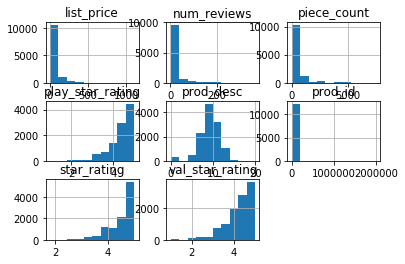

In [165]:
# Geben Sie Histogramme der Spalten mit fehlenden Werten aus
data[data.isnull().columns].hist()

Wir stellen fest, dass die meisten Spalten keine Normalverteilung aufweisen. Die fehlenden Werte hier mit dem Mittelwert der Spalte aufzufüllen, wäre daher ungünstig. Stattdessen kann man bei solchen schiefen Verteilungen den häufigsten Wert einfüllen. 

Für die Bestimmung des häufigsten Wertes und des Mittelwertes gibt es in pandas die Methoden ```.mean()``` und ```.mode()```. Für das Auffüllen von fehlenden Werten gibt es die Methode ```.fillna()```.

```python
some_dataFrame[columns].mean() # Gibt Mittelwerte der Spalten <columns> zurück
some_dataFrame[columns].mode() # Gibt häufigste Werte der Spalten <columns> zurück ACHTUNG: Rückgabewert ist nicht skalar!
some_dataFrame[columns].fillna(value) # Füllt alle fehlenden Werte in den Spalten <columns> mit <value> auf
```



In [216]:
# Füllen Sie die Spalte(n) mit (näherungsweise) normalverteilten Werte mit dem Mittelwert auf
#data[data.isnull().columns].fillna(data[data.isnull()].mean(),inplace = True)
#mean = data['num_reviews'].mean()
#to_fill = [data.isnull().columns]
#print(to_fill)
#data[data.isnull().columns].fillna[data.isnull().mean(),inplace = True]
#data['num_reviews'].fillna(data['num_reviews'].mean(), inplace = True)
data.fillna(data.isnull().mean(), inplace = True)
#print(mean)

# Füllen Sie die Spalte(n) mit nicht normalverteilten Werte mit dem jeweils häufigsten Wert auf
#data[data.isnull().columns].fillna(data.mode())
data.isnull().sum()

ages                 0
list_price           0
num_reviews          0
piece_count          0
play_star_rating     0
prod_desc            0
prod_id              0
review_difficulty    0
set_name             0
star_rating          0
theme_name           0
val_star_rating      0
country              0
height               0
width                0
length               0
dtype: int64

Auch hier sind durchaus andere, Problem-angepasste Möglichkeiten zum Auffüllen oft sinnvoll. Zum Beispiel könnte man den Schwierigkeitsgrad auch versuchen, aus der Anzahl der Teile vorherzusagen, und so das Auffüllen der fehlenden Werte zu einem eigenen Regressionsproblem machen. Oder man versucht zu einer Zeile, in der ein Wert fehlt, eine möglichst ähnliche Zeile zu finden und übernimmt den fehlenden Wert (Nächste Nachbarn-Methode). Das beliebte Python-Toolkit [_scikit-learn_](https://scikit-learn.org/stable/) bietet bspw. eine ganze Reihe von Möglichkeiten zur Imputation im Modul [```sklearn.impute```](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.impute). Im Rahmen dieses Notebooks soll darauf aber nicht weiter eingegangen werden.

<a id="save_data"></a><div><img src="Images/IMG-csv-out.png" style="float:left"> <h2 style="position: relative; top: 6px">3. Daten exportieren</h2>

<p style="position: relative; top: 10px">
Damit ist der Datensatz nun also vollständig und besteht nur noch aus numerischen Merkmalen. Er muss also nur noch in eine CSV-Datei exportiert werden und kann dann von Modellen zur Regression oder Klassifikation ohne weitere Verarbeitung genutzt werden.

Pandas bietet auch hierfür eine einfache Methode an: ```.to_csv()```

```python
some_dataFrame.to_csv(filename)
```
</p>


In [217]:
# Exportieren Sie den aufgeräumten Datensatz in eine Datei namens 'tidy_lego_sets.csv' im Unterordner 'Data'
data.to_csv('Data/tidy_lego_sets.csv')

<p style="text-align:center; font-weight:bold">Herzlichen Glückwunsch! Sie haben erfolgreich den unordentlichen Haufen Lego sortiert.</p>

<img src="Images/IMG-lego-messy-to-tidy.png" width="1080px" style="float:center"/>


<a style="float:left;background-color:black;color:white;text-decoration:none;padding:4px 6px;font-family:-apple-system, BlinkMacSystemFont, &quot;San Francisco&quot;, &quot;Helvetica Neue&quot;, Helvetica, Ubuntu, Roboto, Noto, &quot;Segoe UI&quot;, Arial, sans-serif;font-size:12px;font-weight:bold;line-height:1.2;display:inline-block;border-radius:3px" href="https://unsplash.com/@egnaro?utm_medium=referral&amp;utm_campaign=photographer-credit&amp;utm_content=creditBadge" target="_blank" rel="noopener noreferrer" title="Download free do whatever you want high-resolution photos from Rick Mason"><span style="display:inline-block;padding:2px 3px"><svg xmlns="http://www.w3.org/2000/svg" style="height:12px;width:auto;position:relative;vertical-align:middle;top:-2px;fill:white" viewBox="0 0 32 32"><title>unsplash-logo</title><path d="M10 9V0h12v9H10zm12 5h10v18H0V14h10v9h12v-9z"></path></svg></span><span style="display:inline-block;padding:2px 3px">Photo by Rick Mason</span></a><a style="float:right;background-color:black;color:white;text-decoration:none;padding:4px 6px;font-family:-apple-system, BlinkMacSystemFont, &quot;San Francisco&quot;, &quot;Helvetica Neue&quot;, Helvetica, Ubuntu, Roboto, Noto, &quot;Segoe UI&quot;, Arial, sans-serif;font-size:12px;font-weight:bold;line-height:1.2;display:inline-block;border-radius:3px" href="https://www.reddit.com/r/lego/comments/7mhq2b/finished_kind_of_organizing_my_spare_lego_pieces/" target="_blank" rel="noopener noreferrer" title="Download free do whatever you want high-resolution photos from Rick Mason"><span style="display:inline-block;padding:2px 3px"><svg xmlns="http://www.w3.org/2000/svg" style="height:12px;width:auto;position:relative;vertical-align:middle;top:-2px;fill:white" viewBox="0 0 32 32"><title>unsplash-logo</title><path d="M10 9V0h12v9H10zm12 5h10v18H0V14h10v9h12v-9z"></path></svg></span><span style="display:inline-block;padding:2px 3px">Photo by rexorhun</span></a>


<div>Icons made by <a href="https://www.flaticon.com/authors/swifticons" title="Swifticons">Swifticons</a> from <a href="https://www.flaticon.com/" title="Flaticon">www.flaticon.com</a></div>
<div>Notebook erstelt von Yifei Li & <a href="mailto:simon.stone@tu-dresden.de?Subject=Frage%20zu%20Jupyter%20Notebook%20Lego%20Sets" target="_top">Simon Stone</a></div>